In [2]:
import pandas as pd

# Đọc dữ liệu từ file CSV
file_path = 'data/stock_data.csv'
data = pd.read_csv(file_path)

# 🔍 Kiểm tra thông tin tổng quan
print("\n🔍 Thông tin dữ liệu:")
print(data.info())

# 🔍 Kiểm tra dữ liệu trùng lặp
print("\n⚠️ Số lượng dòng bị trùng:")
print(data.duplicated().sum())

# 🔍 Kiểm tra giá trị thiếu
print("\n⚠️ Số lượng giá trị thiếu trong mỗi cột:")
print(data.isnull().sum())

# 🔍 Kiểm tra cột Date có đúng định dạng datetime không
try:
    data['Date'] = pd.to_datetime(data['Date'])
    print("\n✅ Cột Date đã được chuyển sang datetime.")
except Exception as e:
    print("\n❌ Lỗi: Cột Date không đúng định dạng:", e)

# 🔍 Kiểm tra giá trị bất thường (giá âm, 0)
invalid_prices = data[
    (data['Open'] <= 0) | (data['High'] <= 0) | (data['Low'] <= 0) | (data['Close'] <= 0)
]
print(f"\n⚠️ Số lượng dòng có giá trị giá mở/đóng thấp bất thường: {invalid_prices.shape[0]}")
if not invalid_prices.empty:
    print(invalid_prices.head())

# 🔍 Kiểm tra số lượng dữ liệu của từng mã chứng khoán
ticker_counts = data['Ticker'].value_counts()
print("\n📊 Số lượng dòng của từng mã chứng khoán:")
print(ticker_counts)

# 🔍 Hiển thị thống kê mô tả
print("\n📊 Thống kê mô tả:")
print(data.describe())

# 🔍 Xem 5 dòng đầu của dữ liệu
print("\n🔎 5 dòng đầu của dữ liệu:")
print(data.head())



🔍 Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52200 entries, 0 to 52199
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ticker        52200 non-null  object 
 1   Date          52200 non-null  object 
 2   Open          52200 non-null  float64
 3   High          52200 non-null  float64
 4   Low           52200 non-null  float64
 5   Close         52200 non-null  float64
 6   Volume        52200 non-null  int64  
 7   Price_Change  52200 non-null  float64
 8   Daily_Return  52200 non-null  float64
 9   Volatility    52200 non-null  float64
 10  MA_5          52144 non-null  float64
 11  MA_10         52074 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 4.8+ MB
None

⚠️ Số lượng dòng bị trùng:
0

⚠️ Số lượng giá trị thiếu trong mỗi cột:
Ticker            0
Date              0
Open              0
High              0
Low               0
Close             0
Volume  

In [6]:
import pandas as pd

# Chuyển đổi cột 'Date' thành kiểu datetime, xử lý lỗi nếu có
try:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
except Exception as e:
    print(f"⚠️ Lỗi khi chuyển đổi cột 'Date': {e}")

# Kiểm tra lại sau khi chuyển đổi
print("\n🔍 Thông tin dữ liệu sau khi chuyển đổi:")
print(data.info())

# Kiểm tra các dòng có giá trị thiếu
missing_data = data.isnull().sum()
print("\n⚠️ Số lượng giá trị thiếu trong mỗi cột:")
print(missing_data)

# Sắp xếp dữ liệu theo ngày nếu chưa được sắp xếp
data = data.sort_values(by='Date').reset_index(drop=True)
print("\n📌 Dữ liệu đã được sắp xếp theo ngày.")

# Xóa hàng có giá trị thiếu (nếu có)
if missing_data.sum() > 0:
    print("\n⚠️ Xóa các hàng có giá trị thiếu...")
    data = data.dropna().reset_index(drop=True)

# Hiển thị 5 dòng đầu sau khi xử lý
print("\n🔎 5 dòng đầu của dữ liệu sau khi xử lý:")
print(data.head())



🔍 Thông tin dữ liệu sau khi chuyển đổi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52074 entries, 0 to 52073
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Ticker        52074 non-null  object        
 1   Date          52074 non-null  datetime64[ns]
 2   Open          52074 non-null  float64       
 3   High          52074 non-null  float64       
 4   Low           52074 non-null  float64       
 5   Close         52074 non-null  float64       
 6   Volume        52074 non-null  int64         
 7   Price_Change  52074 non-null  float64       
 8   Daily_Return  52074 non-null  float64       
 9   Volatility    52074 non-null  float64       
 10  MA_5          52074 non-null  float64       
 11  MA_10         52074 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 4.8+ MB
None

⚠️ Số lượng giá trị thiếu trong mỗi cột:
Ticker          0
Date

In [ ]:
import pandas as pd

# Điền giá trị thiếu bằng giá trị trung bình (cho tất cả các cột số)
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].apply(lambda x: x.fillna(x.mean()))

# Kiểm tra lại số lượng giá trị thiếu sau khi điền
missing_data_after = data.isnull().sum()
print("\n⚠️ Giá trị thiếu sau khi điền trung bình:")
print(missing_data_after)

# Nếu vẫn còn giá trị thiếu, dùng phương pháp 'forward fill' (ffill) cho dữ liệu chuỗi thời gian
if missing_data_after.sum() > 0:
    print("\n📌 Áp dụng phương pháp forward fill cho dữ liệu còn thiếu...")
    data.fillna(method='ffill', inplace=True)

# Kiểm tra lại lần cuối
final_missing_data = data.isnull().sum()
print("\n✅ Giá trị thiếu cuối cùng:")
print(final_missing_data)

# Nếu vẫn còn giá trị thiếu, loại bỏ hàng còn thiếu
if final_missing_data.sum() > 0:
    print("\n⚠️ Loại bỏ các dòng còn thiếu...")
    data_cleaned = data.dropna().reset_index(drop=True)
else:
    data_cleaned = data

# Kiểm tra lại dữ liệu sau khi làm sạch
print("\n🔍 Thông tin dữ liệu sau khi làm sạch:")
print(data_cleaned.info())



⚠️ Giá trị thiếu sau khi điền trung bình:
Ticker          0
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Price_Change    0
Daily_Return    0
Volatility      0
MA_5            0
MA_10           0
dtype: int64

✅ Giá trị thiếu cuối cùng:
Ticker          0
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Price_Change    0
Daily_Return    0
Volatility      0
MA_5            0
MA_10           0
dtype: int64

🔍 Thông tin dữ liệu sau khi làm sạch:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52074 entries, 0 to 52073
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Ticker        52074 non-null  object        
 1   Date          52074 non-null  datetime64[ns]
 2   Open          52074 non-null  float64       
 3   High          52074 non-null  float64       
 4   Low           5207

In [8]:
from sklearn.preprocessing import MinMaxScaler
import joblib
import pandas as pd
import numpy as np
import os

# Bước 1: Đảm bảo cột 'Date' đúng định dạng
data['Date'] = pd.to_datetime(data['Date'])

# Bước 2: Lấy danh sách các mã chứng khoán
tickers = data['Ticker'].unique()
print(f"\n📌 Số lượng mã chứng khoán: {len(tickers)}")

# Bước 3: Xử lý dữ liệu cho từng mã chứng khoán
for ticker in tickers:
    ticker_data = data[data['Ticker'] == ticker].sort_values(by='Date').reset_index(drop=True)

    # Chọn cột đặc trưng (bỏ 'Date' và 'Ticker' vì chúng không phải số)
    feature_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 
                       'Price_Change', 'Daily_Return', 'Volatility', 'MA_5', 'MA_10']
    
    # Chia tập huấn luyện & kiểm tra (80% train, 20% test)
    train_size = int(len(ticker_data) * 0.8)
    train_data = ticker_data.iloc[:train_size].reset_index(drop=True)
    test_data = ticker_data.iloc[train_size:].reset_index(drop=True)

    print(f"\n✅ Mã chứng khoán: {ticker}")
    print(f"   - Train size: {train_data.shape[0]} | Test size: {test_data.shape[0]}")

    # Loại bỏ cột không cần thiết
    X_train = train_data.drop(columns=['Close', 'Date', 'Ticker'], errors='ignore').astype(np.float32)
    y_train = train_data['Close'].astype(np.float32)
    X_test = test_data.drop(columns=['Close', 'Date', 'Ticker'], errors='ignore').astype(np.float32)
    y_test = test_data['Close'].astype(np.float32)

    # Kiểm tra số lượng cột đầu vào trước khi chuẩn hóa
    print(f"   - 🔍 Số cột đầu vào: {X_train.shape[1]} (Train), {X_test.shape[1]} (Test)")

    # Chuẩn hóa dữ liệu
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Chuyển thành DataFrame với các cột tương ứng
    train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    # Chèn lại cột 'Date' vào dữ liệu đã chuẩn hóa
    train_df.insert(0, 'Date', train_data['Date'].values)
    test_df.insert(0, 'Date', test_data['Date'].values)

    # Lưu dữ liệu đã chuẩn hóa vào các biến thay vì CSV
    # Lưu scaler vào bộ nhớ thay vì file
    print(f"   - 🚀 Dữ liệu đã chuẩn hóa cho mã chứng khoán {ticker}.")
    print(f"   - 📊 Scaler đã áp dụng cho {ticker}.")

print("\n🎯 Hoàn tất xử lý dữ liệu!")



📌 Số lượng mã chứng khoán: 14

✅ Mã chứng khoán: GOOGL
   - Train size: 3050 | Test size: 763
   - 🔍 Số cột đầu vào: 9 (Train), 9 (Test)
   - 🚀 Dữ liệu đã chuẩn hóa cho mã chứng khoán GOOGL.
   - 📊 Scaler đã áp dụng cho GOOGL.

✅ Mã chứng khoán: INTC
   - Train size: 3050 | Test size: 763
   - 🔍 Số cột đầu vào: 9 (Train), 9 (Test)
   - 🚀 Dữ liệu đã chuẩn hóa cho mã chứng khoán INTC.
   - 📊 Scaler đã áp dụng cho INTC.

✅ Mã chứng khoán: WMT
   - Train size: 3050 | Test size: 763
   - 🔍 Số cột đầu vào: 9 (Train), 9 (Test)
   - 🚀 Dữ liệu đã chuẩn hóa cho mã chứng khoán WMT.
   - 📊 Scaler đã áp dụng cho WMT.

✅ Mã chứng khoán: SPY
   - Train size: 3050 | Test size: 763
   - 🔍 Số cột đầu vào: 9 (Train), 9 (Test)
   - 🚀 Dữ liệu đã chuẩn hóa cho mã chứng khoán SPY.
   - 📊 Scaler đã áp dụng cho SPY.

✅ Mã chứng khoán: MSFT
   - Train size: 3050 | Test size: 763
   - 🔍 Số cột đầu vào: 9 (Train), 9 (Test)
   - 🚀 Dữ liệu đã chuẩn hóa cho mã chứng khoán MSFT.
   - 📊 Scaler đã áp dụng cho MSFT.

✅


🔵 Đang huấn luyện mô hình GRU cho GOOGL...
✅ GOOGL - Dữ liệu huấn luyện: (3045, 5, 9), Dữ liệu kiểm tra: (758, 5, 9)
Epoch 1/50


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0098 - val_loss: 0.0036 - learning_rate: 0.0010
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.4138e-04 - val_loss: 9.8868e-04 - learning_rate: 0.0010
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.3654e-04 - val_loss: 7.4999e-04 - learning_rate: 0.0010
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.5068e-04 - val_loss: 6.2041e-04 - learning_rate: 0.0010
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.8092e-04 - val_loss: 4.9521e-04 - learning_rate: 0.0010
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.3937e-04 - val_loss: 0.0065 - learning_rate: 0.0010
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.1811e-04 - val_loss: 9.0231e-04 - learning_rate: 0.0010
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.4071e-04 - val_loss: 9.8459e-04 - learning_rate: 0.0010
Epoch 9/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.3492e-04 - val_lo

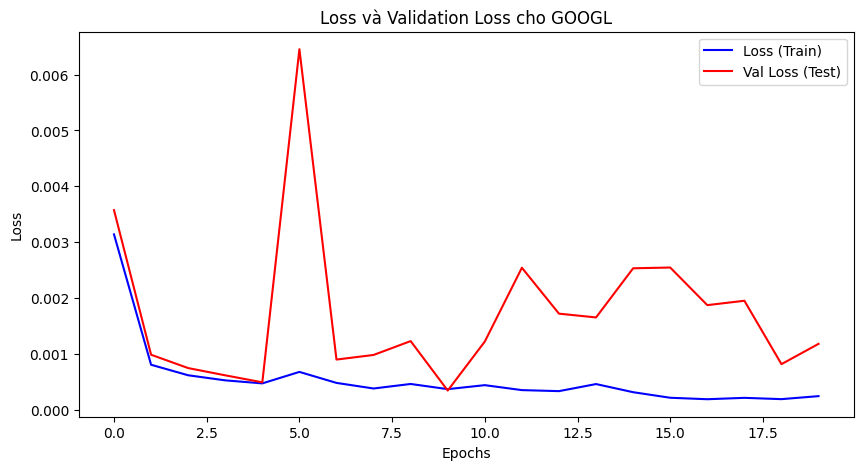


🔵 Đang huấn luyện mô hình GRU cho INTC...
✅ INTC - Dữ liệu huấn luyện: (3045, 5, 9), Dữ liệu kiểm tra: (758, 5, 9)
Epoch 1/50


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0120 - val_loss: 9.0559e-05 - learning_rate: 0.0010
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0012 - val_loss: 3.0393e-04 - learning_rate: 0.0010
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.3661e-04 - val_loss: 1.8706e-04 - learning_rate: 0.0010
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.8507e-04 - val_loss: 1.6054e-04 - learning_rate: 0.0010
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.2793e-04 - val_loss: 1.0271e-04 - learning_rate: 0.0010
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.4809e-04 - val_loss: 7.5932e-05 - learning_rate: 0.0010
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.5129e-04 - val_loss: 1.3238e-04 - learning_rate: 5.0000e-04
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.6457e-04 - val_loss: 8.1037e-05 - learning_rate: 5.0000e-04
Epoch 9/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.1156e

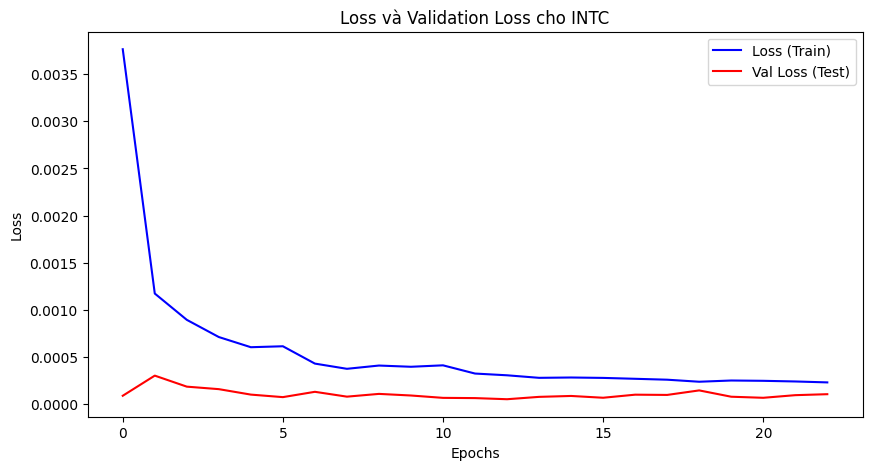


🔵 Đang huấn luyện mô hình GRU cho WMT...
✅ WMT - Dữ liệu huấn luyện: (3045, 5, 9), Dữ liệu kiểm tra: (758, 5, 9)
Epoch 1/50


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0120 - val_loss: 0.0297 - learning_rate: 0.0010
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.9667e-04 - val_loss: 0.0438 - learning_rate: 0.0010
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.3885e-04 - val_loss: 0.0340 - learning_rate: 0.0010
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.9558e-04 - val_loss: 0.0400 - learning_rate: 0.0010
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.8534e-04 - val_loss: 0.0351 - learning_rate: 0.0010
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.2147e-04 - val_loss: 0.0281 - learning_rate: 0.0010
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.7225e-04 - val_loss: 0.0466 - learning_rate: 0.0010
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.9009e-04 - val_loss: 0.0262 - learning_rate: 0.0010
Epoch 9/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.0381e-04 - val_loss: 0.0271 - learning_ra

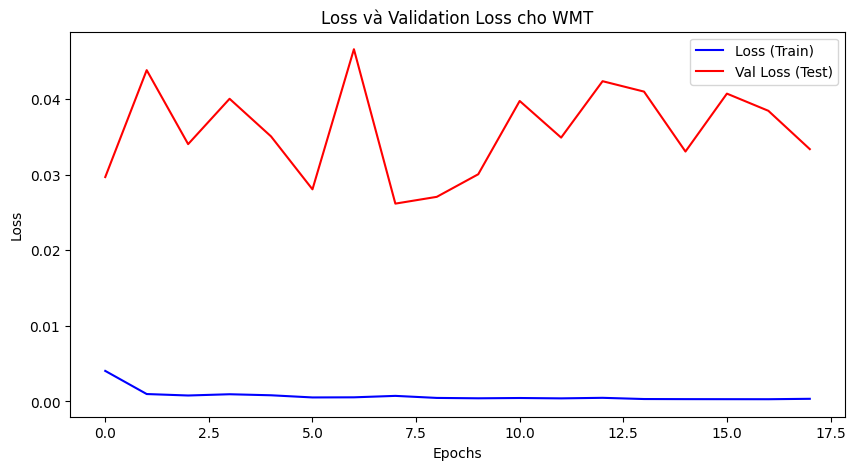


🔵 Đang huấn luyện mô hình GRU cho SPY...
✅ SPY - Dữ liệu huấn luyện: (3045, 5, 9), Dữ liệu kiểm tra: (758, 5, 9)
Epoch 1/50


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0150 - val_loss: 0.0039 - learning_rate: 0.0010
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.2937e-04 - val_loss: 0.0018 - learning_rate: 0.0010
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.5499e-04 - val_loss: 4.2048e-04 - learning_rate: 0.0010
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.9459e-04 - val_loss: 1.5944e-04 - learning_rate: 0.0010
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.3806e-04 - val_loss: 0.0028 - learning_rate: 0.0010
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.1915e-04 - val_loss: 0.0013 - learning_rate: 0.0010
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.0882e-04 - val_loss: 0.0059 - learning_rate: 0.0010
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.8899e-04 - val_loss: 0.0013 - learning_rate: 0.0010
Epoch 9/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.2083e-04 - val_loss: 0.0031 - lea

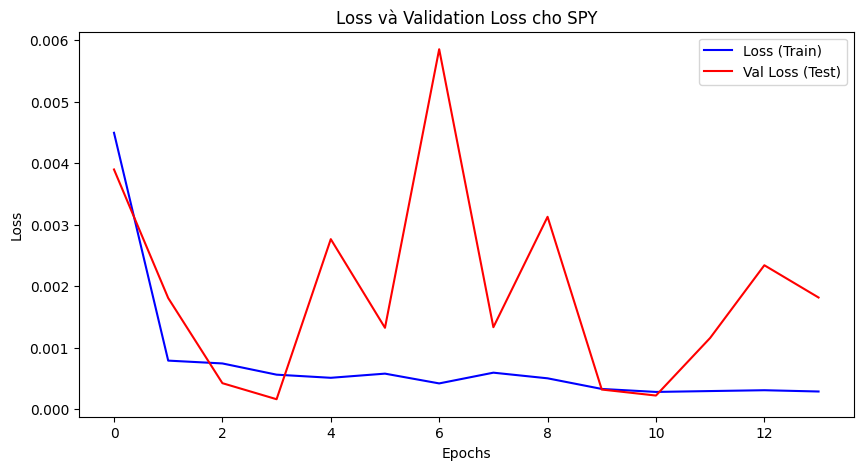


🔵 Đang huấn luyện mô hình GRU cho MSFT...
✅ MSFT - Dữ liệu huấn luyện: (3045, 5, 9), Dữ liệu kiểm tra: (758, 5, 9)
Epoch 1/50


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0103 - val_loss: 0.0023 - learning_rate: 0.0010
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.7002e-04 - val_loss: 6.7601e-04 - learning_rate: 0.0010
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.2615e-04 - val_loss: 0.0046 - learning_rate: 0.0010
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.4332e-04 - val_loss: 0.0021 - learning_rate: 0.0010
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.0123e-04 - val_loss: 0.0052 - learning_rate: 0.0010
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.0526e-04 - val_loss: 0.0079 - learning_rate: 0.0010
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.1403e-04 - val_loss: 6.1124e-04 - learning_rate: 0.0010
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.1737e-04 - val_loss: 2.5213e-04 - learning_rate: 5.0000e-04
Epoch 9/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.2391e-04 - val_loss: 8.25

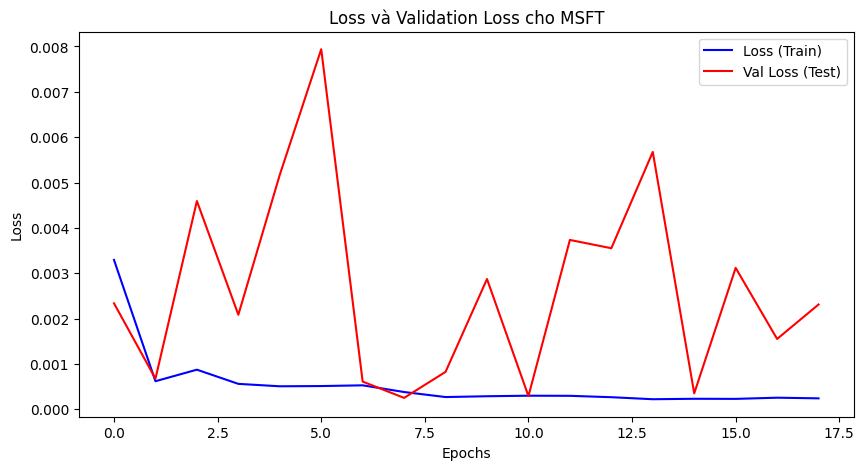


🔵 Đang huấn luyện mô hình GRU cho BA...
✅ BA - Dữ liệu huấn luyện: (3045, 5, 9), Dữ liệu kiểm tra: (758, 5, 9)
Epoch 1/50


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0147 - val_loss: 3.0934e-04 - learning_rate: 0.0010
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.7417e-04 - val_loss: 1.3136e-04 - learning_rate: 0.0010
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.3576e-04 - val_loss: 1.8367e-04 - learning_rate: 0.0010
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.9938e-04 - val_loss: 1.5455e-05 - learning_rate: 0.0010
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.8368e-04 - val_loss: 7.6104e-05 - learning_rate: 0.0010
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.1608e-04 - val_loss: 3.4999e-04 - learning_rate: 0.0010
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.2106e-04 - val_loss: 9.5661e-05 - learning_rate: 0.0010
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.9828e-04 - val_loss: 1.7621e-04 - learning_rate: 0.0010
Epoch 9/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.8299e-04 

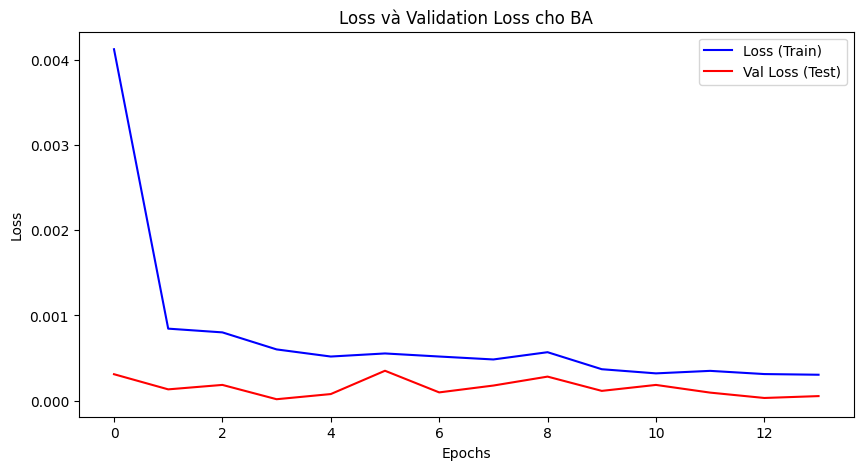


🔵 Đang huấn luyện mô hình GRU cho AAPL...
✅ AAPL - Dữ liệu huấn luyện: (3045, 5, 9), Dữ liệu kiểm tra: (758, 5, 9)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0092 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.7625e-04 - val_loss: 6.9559e-04 - learning_rate: 0.0010
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.8191e-04 - val_loss: 0.0018 - learning_rate: 0.0010
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.2333e-04 - val_loss: 0.0041 - learning_rate: 0.0010
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.3380e-04 - val_loss: 0.0071 - learning_rate: 0.0010
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.3046e-04 - val_loss: 0.0080 - learning_rate: 0.0010
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.6770e-04 - val_loss: 0.0016 - learning_rate: 0.0010
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.8186e-04 - val_loss: 0.0018 - learning_rate: 5.0000e-04
Epoch 9/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.8661e-04 - val_loss: 0

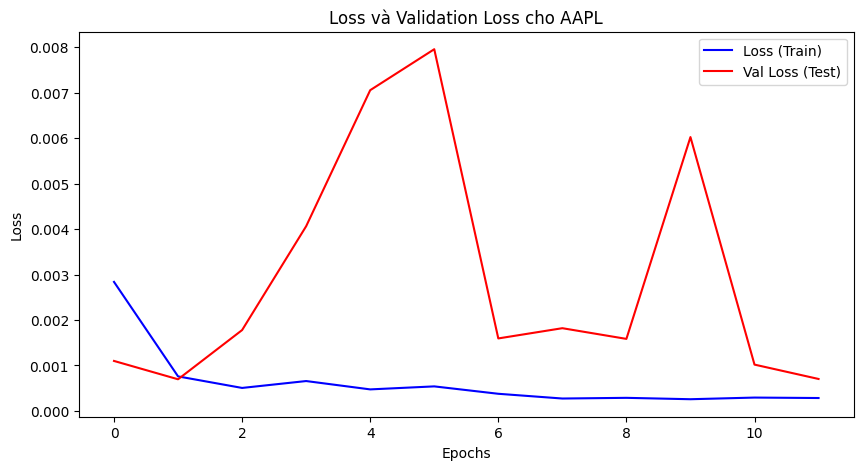


🔵 Đang huấn luyện mô hình GRU cho DIS...
✅ DIS - Dữ liệu huấn luyện: (3045, 5, 9), Dữ liệu kiểm tra: (758, 5, 9)
Epoch 1/50


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0069 - val_loss: 2.4898e-04 - learning_rate: 0.0010
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0011 - val_loss: 1.4280e-04 - learning_rate: 0.0010
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.3384e-04 - val_loss: 5.7877e-04 - learning_rate: 0.0010
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.4024e-04 - val_loss: 3.6513e-04 - learning_rate: 0.0010
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.0549e-04 - val_loss: 4.1748e-05 - learning_rate: 0.0010
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.7487e-04 - val_loss: 1.2112e-04 - learning_rate: 0.0010
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.7572e-04 - val_loss: 1.0525e-04 - learning_rate: 0.0010
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.5280e-04 - val_loss: 3.0524e-05 - learning_rate: 0.0010
Epoch 9/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.0045e-04 - va

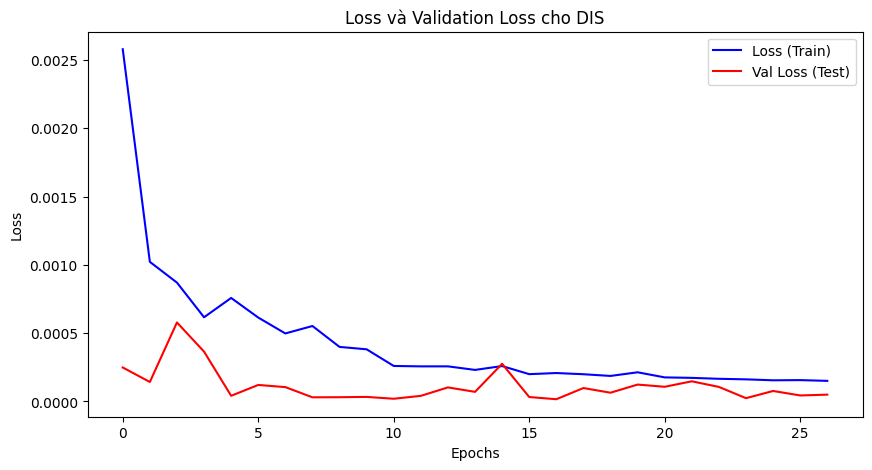


🔵 Đang huấn luyện mô hình GRU cho NVDA...
✅ NVDA - Dữ liệu huấn luyện: (3045, 5, 9), Dữ liệu kiểm tra: (758, 5, 9)
Epoch 1/50


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0058 - val_loss: 0.6122 - learning_rate: 0.0010
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.4760e-04 - val_loss: 0.8622 - learning_rate: 0.0010
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.3045e-04 - val_loss: 0.6220 - learning_rate: 0.0010
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.6311e-04 - val_loss: 0.9210 - learning_rate: 0.0010
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.7186e-04 - val_loss: 0.6064 - learning_rate: 0.0010
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.6490e-04 - val_loss: 0.6028 - learning_rate: 0.0010
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.3748e-04 - val_loss: 0.4602 - learning_rate: 0.0010
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.7967e-04 - val_loss: 0.4482 - learning_rate: 0.0010
Epoch 9/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.3155e-04 - val_loss: 0.6882 - learning_ra

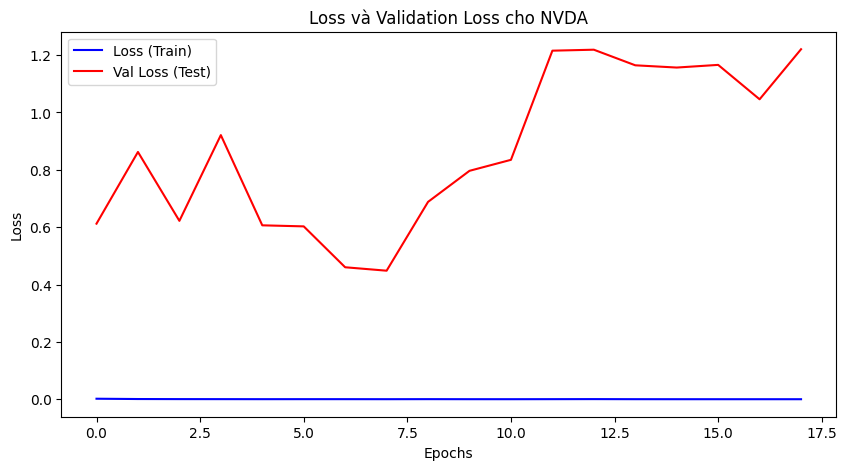


🔵 Đang huấn luyện mô hình GRU cho NFLX...
✅ NFLX - Dữ liệu huấn luyện: (3045, 5, 9), Dữ liệu kiểm tra: (758, 5, 9)
Epoch 1/50


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0098 - val_loss: 5.0392e-04 - learning_rate: 0.0010
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011 - val_loss: 0.0017 - learning_rate: 0.0010
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.8454e-04 - val_loss: 0.0048 - learning_rate: 0.0010
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.1745e-04 - val_loss: 4.6239e-04 - learning_rate: 0.0010
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.7950e-04 - val_loss: 0.0039 - learning_rate: 0.0010
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.6430e-04 - val_loss: 8.5747e-04 - learning_rate: 0.0010
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.5473e-04 - val_loss: 0.0040 - learning_rate: 5.0000e-04
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.3232e-04 - val_loss: 0.0018 - learning_rate: 5.0000e-04
Epoch 9/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.9500e-04 - val_loss: 6.50

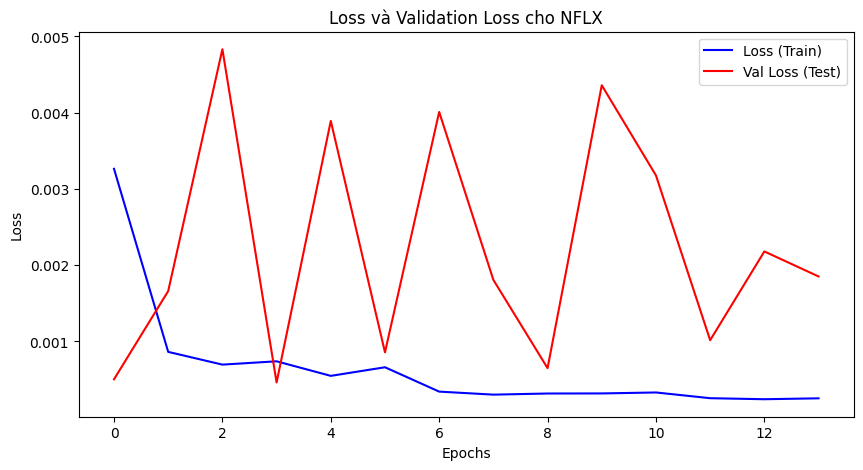


🔵 Đang huấn luyện mô hình GRU cho AMD...
✅ AMD - Dữ liệu huấn luyện: (3045, 5, 9), Dữ liệu kiểm tra: (758, 5, 9)
Epoch 1/50


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0054 - val_loss: 1.2772e-04 - learning_rate: 0.0010
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.8756e-04 - val_loss: 1.5365e-04 - learning_rate: 0.0010
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.8614e-04 - val_loss: 8.1650e-04 - learning_rate: 0.0010
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.2318e-04 - val_loss: 2.8364e-04 - learning_rate: 0.0010
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.2499e-04 - val_loss: 0.0051 - learning_rate: 0.0010
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.0020e-04 - val_loss: 1.1045e-04 - learning_rate: 0.0010
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.5049e-04 - val_loss: 9.1505e-04 - learning_rate: 5.0000e-04
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3814e-04 - val_loss: 0.0015 - learning_rate: 5.0000e-04
Epoch 9/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3493e-04 

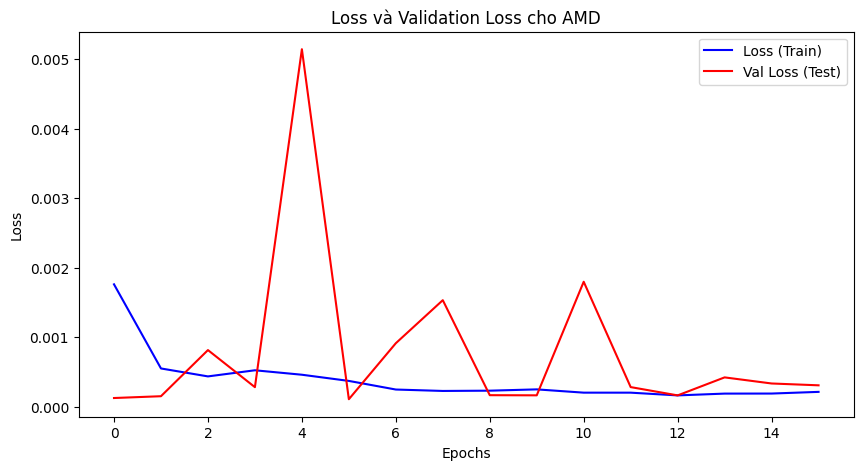


🔵 Đang huấn luyện mô hình GRU cho AMZN...
✅ AMZN - Dữ liệu huấn luyện: (3045, 5, 9), Dữ liệu kiểm tra: (758, 5, 9)
Epoch 1/50


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0081 - val_loss: 5.8297e-04 - learning_rate: 0.0010
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0011 - val_loss: 0.0055 - learning_rate: 0.0010
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.0889e-04 - val_loss: 0.0080 - learning_rate: 0.0010
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.9625e-04 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.5750e-04 - val_loss: 3.1156e-04 - learning_rate: 0.0010
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.9543e-04 - val_loss: 0.0025 - learning_rate: 0.0010
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.2705e-04 - val_loss: 0.0046 - learning_rate: 0.0010
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.1662e-04 - val_loss: 0.0070 - learning_rate: 0.0010
Epoch 9/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.9639e-04 - val_loss: 0.0035 - learnin

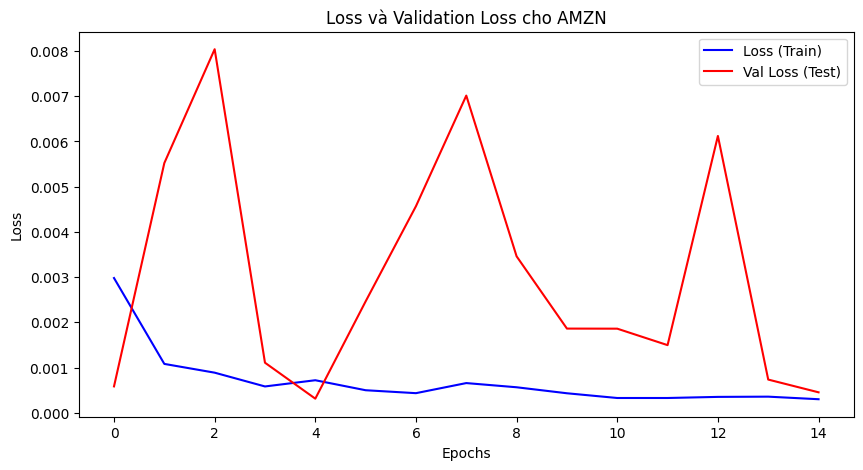


🔵 Đang huấn luyện mô hình GRU cho TSLA...
✅ TSLA - Dữ liệu huấn luyện: (2947, 5, 9), Dữ liệu kiểm tra: (734, 5, 9)
Epoch 1/50


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0042 - val_loss: 0.0012 - learning_rate: 0.0010
Epoch 2/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.1589e-04 - val_loss: 2.2692e-04 - learning_rate: 0.0010
Epoch 3/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.6409e-04 - val_loss: 0.0036 - learning_rate: 0.0010
Epoch 4/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.4272e-04 - val_loss: 0.0010 - learning_rate: 0.0010
Epoch 5/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.1315e-04 - val_loss: 1.0070e-04 - learning_rate: 0.0010
Epoch 6/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.2477e-04 - val_loss: 1.3225e-04 - learning_rate: 0.0010
Epoch 7/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.5896e-04 - val_loss: 4.9751e-04 - learning_rate: 0.0010
Epoch 8/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.0686e-04 - val_loss: 0.0013 - learning_rate: 0.0010
Epoch 9/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.9319e-04 - val_loss: 0.00

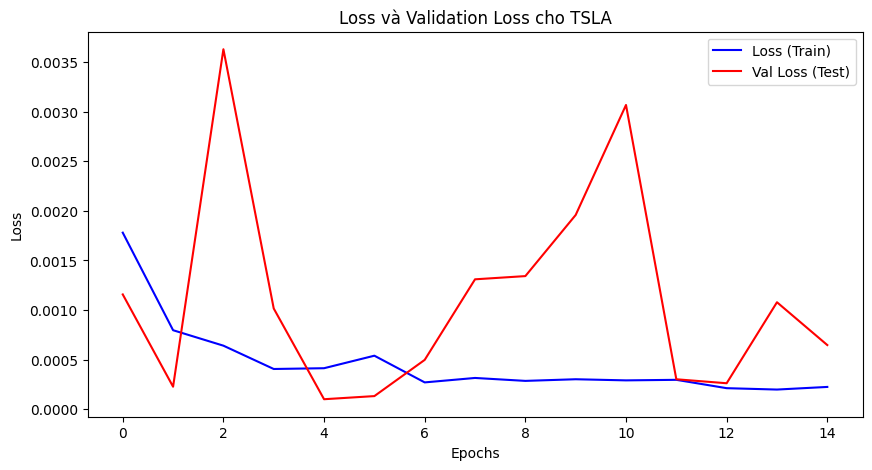


🔵 Đang huấn luyện mô hình GRU cho BABA...
✅ BABA - Dữ liệu huấn luyện: (2096, 5, 9), Dữ liệu kiểm tra: (521, 5, 9)
Epoch 1/50


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0188 - val_loss: 1.9888e-05 - learning_rate: 0.0010
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0010 - val_loss: 3.9826e-05 - learning_rate: 0.0010
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.0570e-04 - val_loss: 2.7106e-05 - learning_rate: 0.0010
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.4185e-04 - val_loss: 5.6692e-05 - learning_rate: 0.0010
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.6616e-04 - val_loss: 3.3624e-04 - learning_rate: 0.0010
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.7186e-04 - val_loss: 3.5619e-05 - learning_rate: 0.0010
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.6606e-04 - val_loss: 4.3878e-05 - learning_rate: 5.0000e-04
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.6885e-04 - val_loss: 3.1828e-05 - learning_rate: 5.0000e-04
Epoch 9/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.0104e

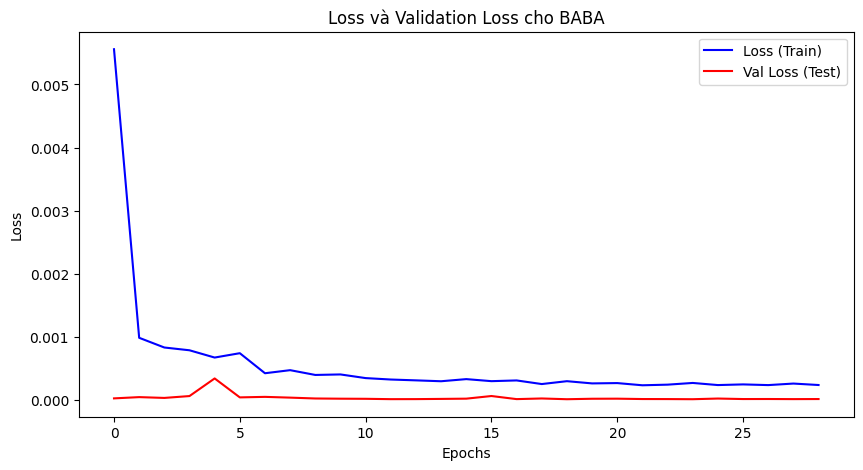


🎯 Huấn luyện hoàn tất!


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib
import os

# Số ngày quá khứ làm timestep
TIME_STEP = 5

# Đảm bảo thư mục models/gru_models và history/gru tồn tại
os.makedirs('models/gru_models', exist_ok=True)
os.makedirs('history/gru', exist_ok=True)

# Bước 1: Duyệt qua từng mã chứng khoán
for ticker in tickers:
    print(f"\n🔵 Đang huấn luyện mô hình GRU cho {ticker}...")

    # Bước 2: Đọc dữ liệu đã chuẩn hóa từ file CSV
    train_path = f'data/{ticker}_train_data.csv'
    test_path = f'data/{ticker}_test_data.csv'

    if not os.path.exists(train_path) or not os.path.exists(test_path):
        print(f"⚠️ Không tìm thấy dữ liệu cho {ticker}, bỏ qua...")
        continue

    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)

    # Lấy scaler đã lưu trước đó
    scaler = joblib.load(f'scaler/{ticker}_scaler.pkl')

    # Bước 3: Chuẩn bị dữ liệu với timestep
    def create_sequences(data, time_step):
        X, y = [], []
        for i in range(len(data) - time_step):
            X.append(data[i:i + time_step, :])
            y.append(data[i + time_step, -1])
        return np.array(X), np.array(y)

    # Bước 4: Chia dữ liệu thành X, y
    train_data = train_df.iloc[:, 1:].values
    test_data = test_df.iloc[:, 1:].values

    if len(train_data) < TIME_STEP or len(test_data) < TIME_STEP:
        print(f"⚠️ Dữ liệu {ticker} không đủ để tạo {TIME_STEP} timestep, bỏ qua...")
        continue

    X_train, y_train = create_sequences(train_data, TIME_STEP)
    X_test, y_test = create_sequences(test_data, TIME_STEP)

    print(f"✅ {ticker} - Dữ liệu huấn luyện: {X_train.shape}, Dữ liệu kiểm tra: {X_test.shape}")

    # Bước 5: Tạo mô hình GRU
    model = Sequential([
        GRU(units=128, return_sequences=True, input_shape=(TIME_STEP, X_train.shape[2])),
        Dropout(0.2),
        GRU(units=128, return_sequences=False),
        Dropout(0.2),
        Dense(units=64, activation='relu'),
        Dense(units=1)  # Dự đoán giá 'Close'
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Bước 6: Callbacks để tối ưu hóa training
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

    # Bước 7: Huấn luyện mô hình
    history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test),
                        callbacks=[early_stopping, reduce_lr], verbose=1)

    # Bước 8: Dự đoán và đánh giá mô hình
    y_pred = model.predict(X_test)

    # Chuyển đổi dự đoán về giá trị thực
    y_test_rescaled = scaler.inverse_transform(
        np.hstack((X_test[:, -1, :-1], y_test.reshape(-1, 1)))
    )[:, -1]

    y_pred_rescaled = scaler.inverse_transform(
        np.hstack((X_test[:, -1, :-1], y_pred))
    )[:, -1]

    # Đánh giá mô hình
    mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
    mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_rescaled, y_pred_rescaled)

    print(f"📊 Hiệu suất mô hình cho {ticker}:")
    print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

    # Bước 9: Lưu mô hình đã huấn luyện trong thư mục gru_models
    model.save(f'models/gru_models/{ticker}_gru_model.keras')
    print(f"✅ Mô hình GRU cho {ticker} đã lưu tại models/gru_models/{ticker}_gru_model.keras")

    # Lưu lịch sử loss vào file
    history_df = pd.DataFrame(history.history)
    history_df.to_csv(f'history/gru/{ticker}_training_history.csv', index=False)

    # Bước 10: Vẽ biểu đồ loss và val_loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Loss (Train)', color='blue')
    plt.plot(history.history['val_loss'], label='Val Loss (Test)', color='red')
    plt.title(f"Loss và Validation Loss cho {ticker}")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'history/gru/{ticker}_loss_plot.png')
    plt.show()

print("\n🎯 Huấn luyện hoàn tất!")


✅ Đã tải mô hình GRU từ: models/gru_models/MSFT_gru_model.keras
Đang tính tầm quan trọng cho Open...
Đang tính tầm quan trọng cho High...
Đang tính tầm quan trọng cho Low...
Đang tính tầm quan trọng cho Volume...
Đang tính tầm quan trọng cho Price_Change...
Đang tính tầm quan trọng cho Daily_Return...
Đang tính tầm quan trọng cho Volatility...
Đang tính tầm quan trọng cho MA_5...
Đang tính tầm quan trọng cho MA_10...

📊 Mức độ quan trọng của các đặc trưng đầu vào cho MSFT:
        Feature    Importance           Std
2           Low  9.285455e-03  4.075125e-04
7          MA_5  4.718516e-03  1.860890e-04
0          Open  4.231170e-03  1.071693e-04
8         MA_10  3.395678e-03  1.723683e-04
1          High  3.100147e-03  7.745875e-05
3        Volume  1.563197e-05  6.010717e-07
5  Daily_Return  4.886412e-06  1.899824e-06
4  Price_Change  2.402977e-06  1.820407e-06
6    Volatility  9.974225e-07  8.764910e-07


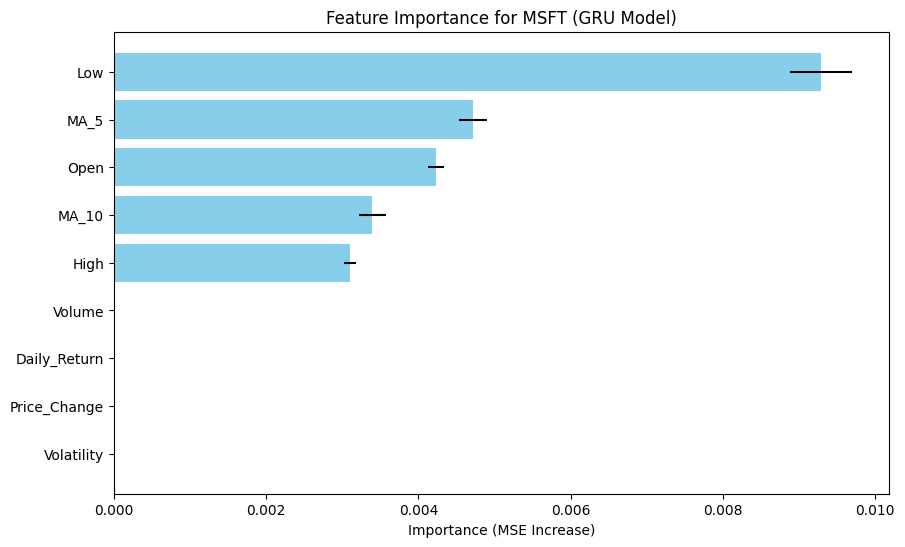


🎯 Hoàn tất phân tích!


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error
import joblib
import os

# Thiết lập tham số
TIME_STEP = 5  # Số ngày quá khứ làm timestep
ticker = 'MSFT'  # Ví dụ với mã AAPL, bạn có thể thay đổi
feature_columns = ['Open', 'High', 'Low', 'Volume', 'Price_Change', 'Daily_Return', 'Volatility', 'MA_5', 'MA_10']

# Đường dẫn đến mô hình đã lưu
model_path = f'models/gru_models/{ticker}_gru_model.keras'
test_path = f'data/{ticker}_test_data.csv'

# Kiểm tra xem file có tồn tại không
if not os.path.exists(model_path) or not os.path.exists(test_path):
    print(f"⚠️ Không tìm thấy mô hình hoặc dữ liệu cho {ticker}")
else:
    # Tải mô hình đã huấn luyện
    model = load_model(model_path)
    print(f"✅ Đã tải mô hình GRU từ: {model_path}")

    # Đọc dữ liệu kiểm tra
    test_df = pd.read_csv(test_path)

    # Lấy scaler đã lưu
    scaler = joblib.load(f'scaler/{ticker}_scaler.pkl')

    # Hàm tạo chuỗi thời gian
    def create_sequences(data, time_step):
        X, y = [], []
        for i in range(len(data) - time_step):
            X.append(data[i:i + time_step, :])
            y.append(data[i + time_step, -1])
        return np.array(X), np.array(y)

    # Chuẩn bị dữ liệu kiểm tra
    test_data = test_df.iloc[:, 1:].values  # Bỏ cột 'Date'
    X_test, y_test = create_sequences(test_data, TIME_STEP)

    # Dự đoán ban đầu để làm baseline
    y_pred_baseline = model.predict(X_test, verbose=0).flatten()
    baseline_mse = mean_squared_error(y_test, y_pred_baseline)

    # Hàm tính tầm quan trọng của đặc trưng thủ công
    def compute_feature_importance(model, X, y, feature_idx, n_repeats=10):
        scores = []
        X_permuted = X.copy()
        for _ in range(n_repeats):
            # Xáo trộn giá trị của đặc trưng tại feature_idx
            np.random.shuffle(X_permuted[:, :, feature_idx])
            y_pred_permuted = model.predict(X_permuted, verbose=0).flatten()
            mse_permuted = mean_squared_error(y, y_pred_permuted)
            scores.append(mse_permuted - baseline_mse)  # Tăng MSE = quan trọng hơn
        return np.mean(scores), np.std(scores)

    # Tính tầm quan trọng cho từng đặc trưng
    importances = []
    stds = []
    for idx, feature in enumerate(feature_columns):
        mean_importance, std_importance = compute_feature_importance(model, X_test, y_test, idx)
        importances.append(mean_importance)
        stds.append(std_importance)
        print(f"Đang tính tầm quan trọng cho {feature}...")

    # Hiển thị mức độ quan trọng của các đặc trưng
    importance_df = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': importances,
        'Std': stds
    })
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    print(f"\n📊 Mức độ quan trọng của các đặc trưng đầu vào cho {ticker}:")
    print(importance_df)

    # Vẽ biểu đồ tầm quan trọng
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], xerr=importance_df['Std'], color='skyblue')
    plt.xlabel('Importance (MSE Increase)')
    plt.title(f'Feature Importance for {ticker} (GRU Model)')
    plt.gca().invert_yaxis()
    plt.show()

print("\n🎯 Hoàn tất phân tích!")


=== Đánh giá mô hình cho GOOGL ===
✅ GOOGL - Dữ liệu train: (3045, 5, 9), test: (758, 5, 9)
📌 Đọc dữ liệu test từ: data/GOOGL_test_data.csv của GOOGL
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Train: MSE=0.8785, MAE=0.7573, RMSE=0.9373, R2=0.9992
Test:  MSE=3.3275, MAE=1.4098, RMSE=1.8242, R2=0.9963


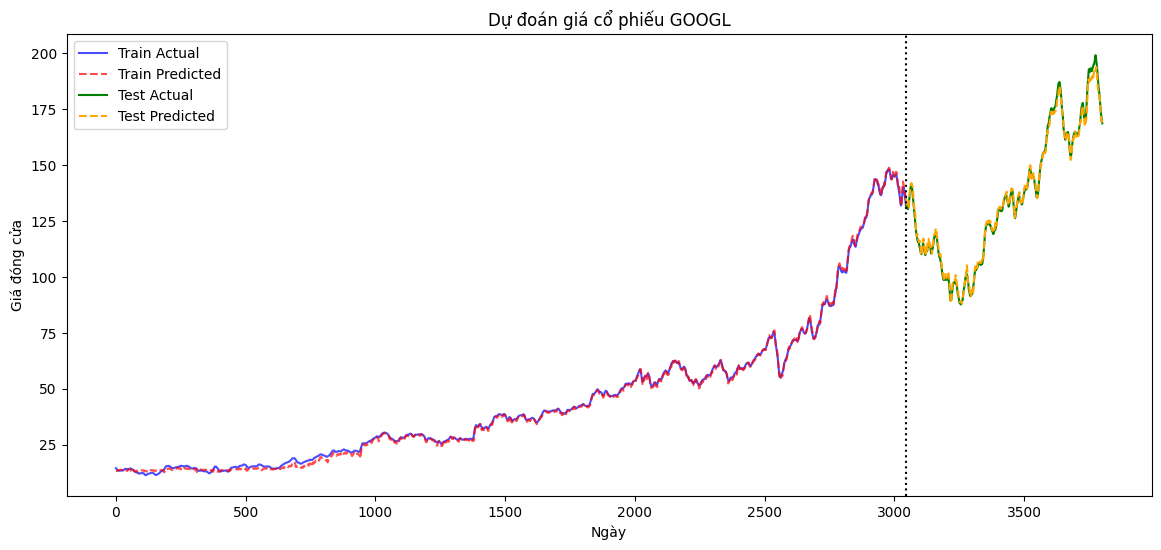


=== Đánh giá mô hình cho NFLX ===
✅ NFLX - Dữ liệu train: (3045, 5, 9), test: (758, 5, 9)
📌 Đọc dữ liệu test từ: data/NFLX_test_data.csv của NFLX
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Train: MSE=37.3983, MAE=4.4653, RMSE=6.1154, R2=0.9989
Test:  MSE=90.2162, MAE=8.0934, RMSE=9.4982, R2=0.9981


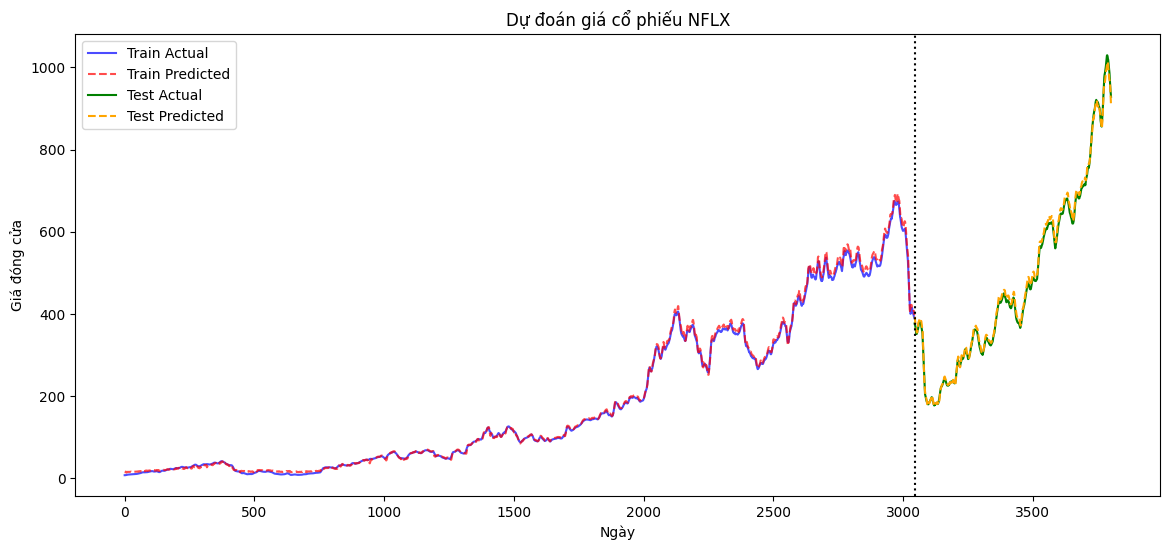


=== Đánh giá mô hình cho NVDA ===
✅ NVDA - Dữ liệu train: (3045, 5, 9), test: (758, 5, 9)
📌 Đọc dữ liệu test từ: data/NVDA_test_data.csv của NVDA
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Train: MSE=0.0323, MAE=0.1332, RMSE=0.1797, R2=0.9992
Test:  MSE=546.4887, MAE=13.5779, RMSE=23.3771, R2=0.7294


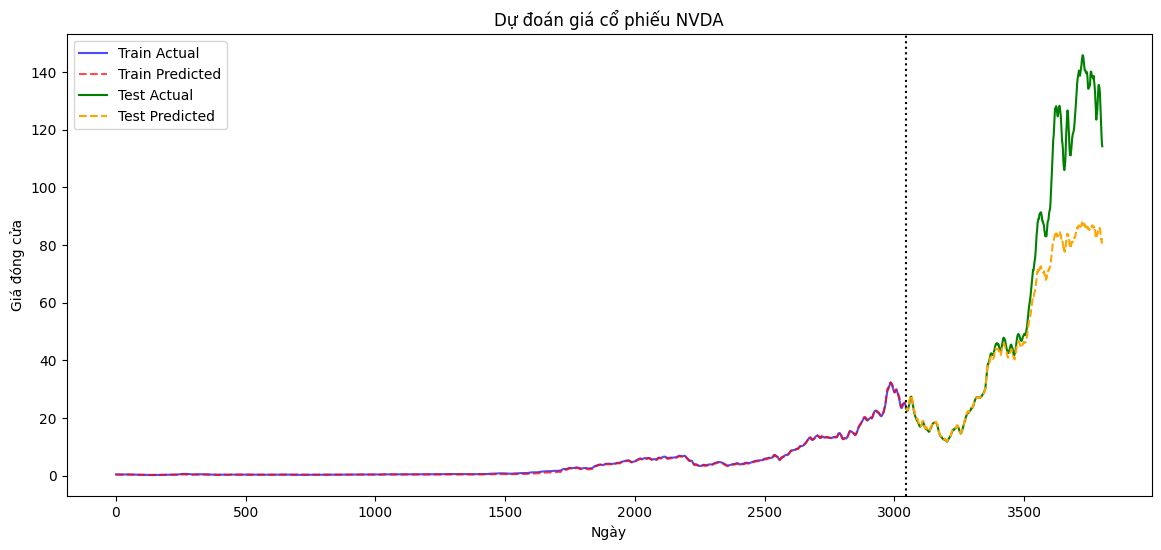


=== Đánh giá mô hình cho BA ===
✅ BA - Dữ liệu train: (3045, 5, 9), test: (758, 5, 9)
📌 Đọc dữ liệu test từ: data/BA_test_data.csv của BA
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Train: MSE=16.4914, MAE=2.6662, RMSE=4.0610, R2=0.9983
Test:  MSE=2.3647, MAE=1.1710, RMSE=1.5378, R2=0.9971


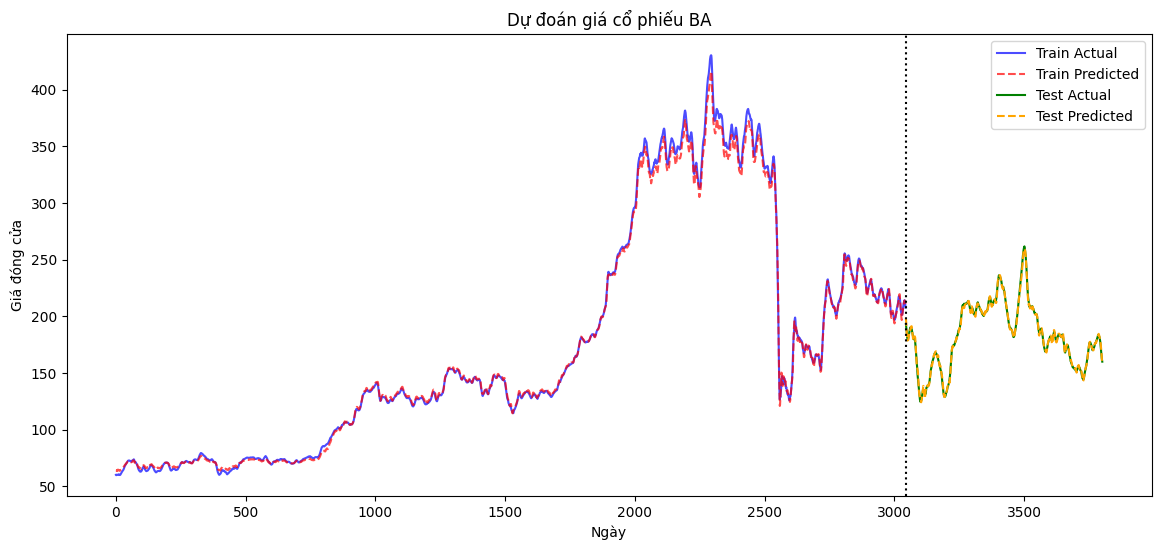


=== Đánh giá mô hình cho DIS ===
✅ DIS - Dữ liệu train: (3045, 5, 9), test: (758, 5, 9)
📌 Đọc dữ liệu test từ: data/DIS_test_data.csv của DIS
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Train: MSE=1.0338, MAE=0.6821, RMSE=1.0167, R2=0.9994
Test:  MSE=0.3902, MAE=0.4772, RMSE=0.6247, R2=0.9975


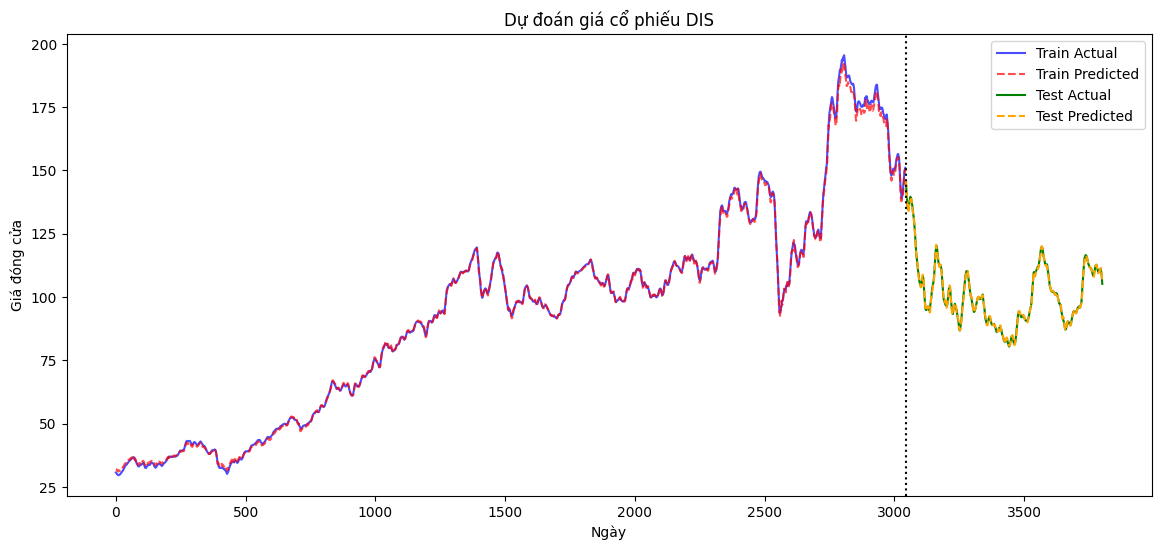


=== Đánh giá mô hình cho AMD ===
✅ AMD - Dữ liệu train: (3045, 5, 9), test: (758, 5, 9)
📌 Đọc dữ liệu test từ: data/AMD_test_data.csv của AMD
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Train: MSE=0.3751, MAE=0.4462, RMSE=0.6125, R2=0.9996
Test:  MSE=2.3329, MAE=1.1697, RMSE=1.5274, R2=0.9980


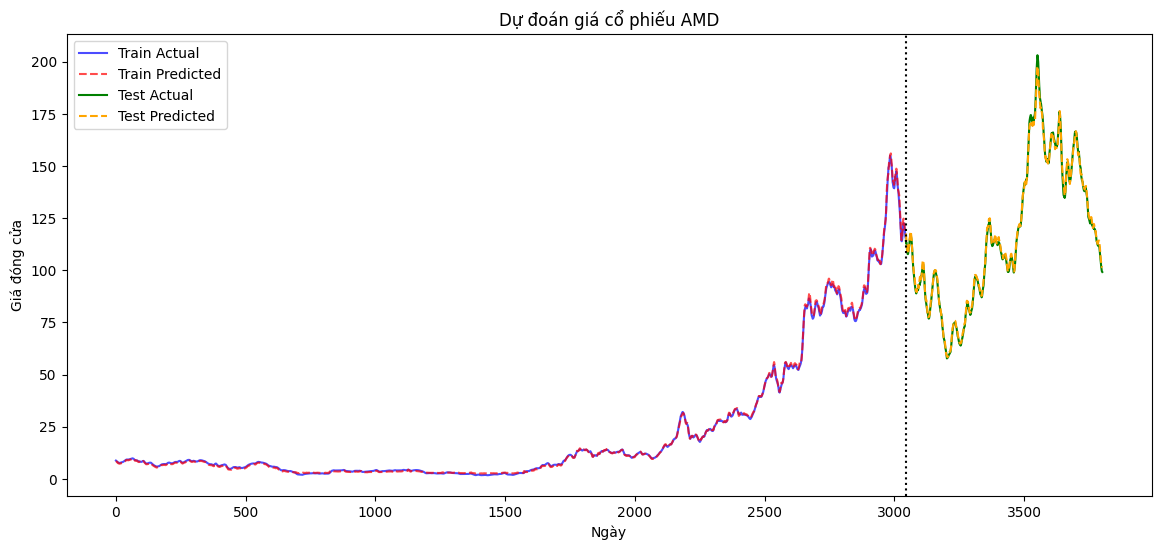


=== Đánh giá mô hình cho INTC ===
✅ INTC - Dữ liệu train: (3045, 5, 9), test: (758, 5, 9)
📌 Đọc dữ liệu test từ: data/INTC_test_data.csv của INTC
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Train: MSE=0.2770, MAE=0.3511, RMSE=0.5263, R2=0.9984
Test:  MSE=0.1273, MAE=0.2866, RMSE=0.3568, R2=0.9981


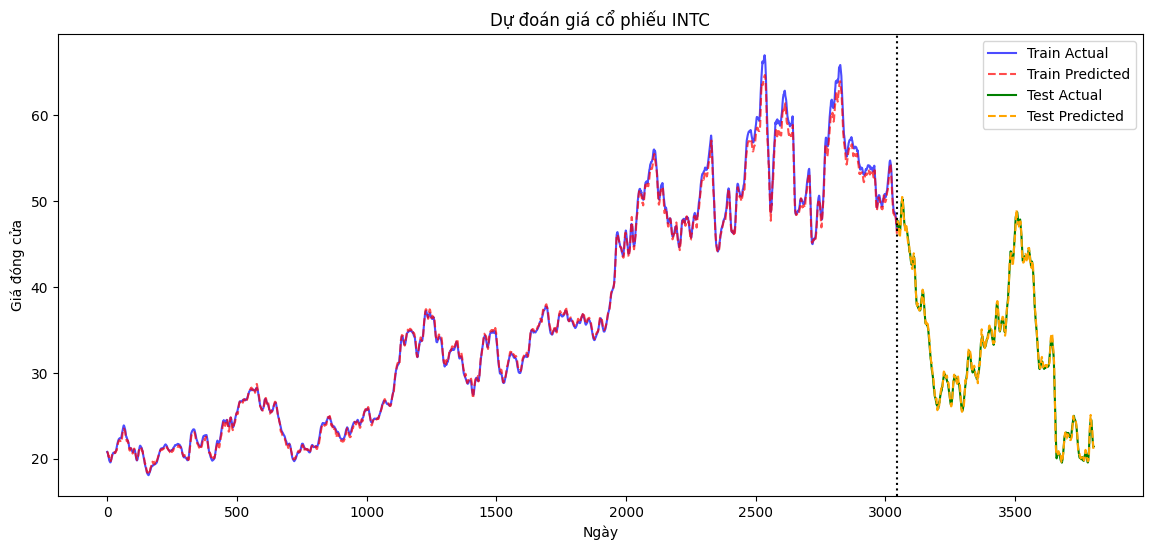


=== Đánh giá mô hình cho MSFT ===
✅ MSFT - Dữ liệu train: (3045, 5, 9), test: (758, 5, 9)
📌 Đọc dữ liệu test từ: data/MSFT_test_data.csv của MSFT
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Train: MSE=6.6663, MAE=1.9697, RMSE=2.5819, R2=0.9989
Test:  MSE=35.1394, MAE=5.2706, RMSE=5.9279, R2=0.9932


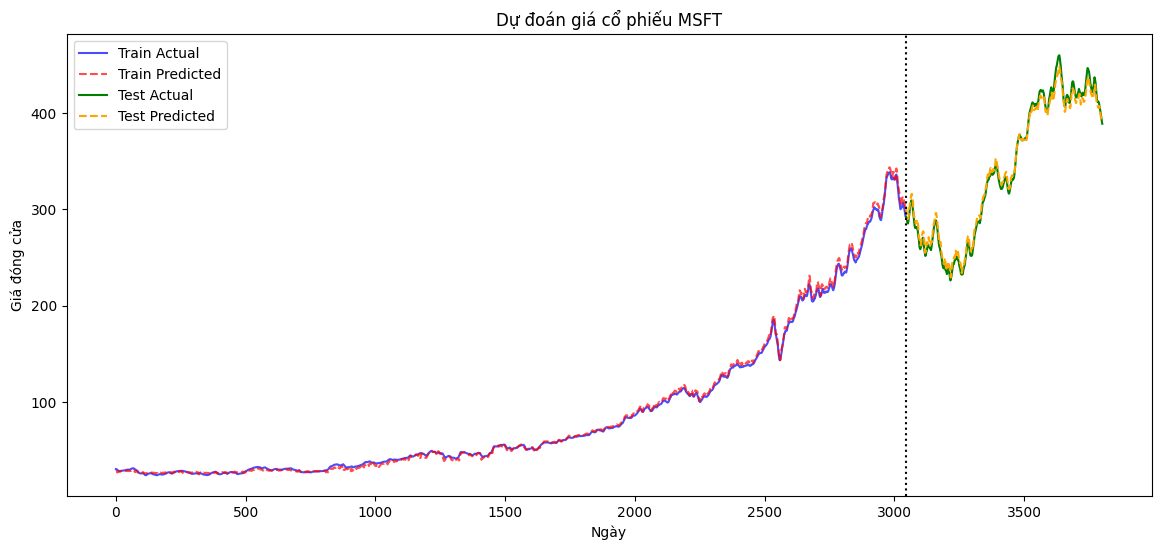


=== Đánh giá mô hình cho AMZN ===
✅ AMZN - Dữ liệu train: (3045, 5, 9), test: (758, 5, 9)
📌 Đọc dữ liệu test từ: data/AMZN_test_data.csv của AMZN
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Train: MSE=1.4776, MAE=0.9682, RMSE=1.2156, R2=0.9995
Test:  MSE=9.4226, MAE=2.2898, RMSE=3.0696, R2=0.9940


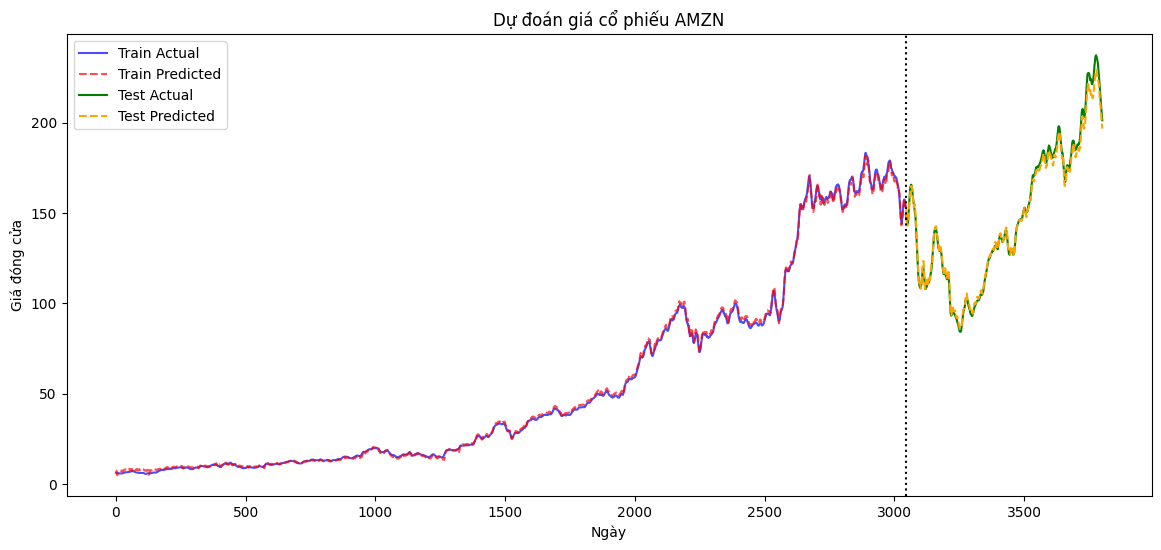


=== Đánh giá mô hình cho AAPL ===
✅ AAPL - Dữ liệu train: (3045, 5, 9), test: (758, 5, 9)
📌 Đọc dữ liệu test từ: data/AAPL_test_data.csv của AAPL
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Train: MSE=1.1256, MAE=0.6582, RMSE=1.0610, R2=0.9993
Test:  MSE=8.1715, MAE=2.4753, RMSE=2.8586, R2=0.9919


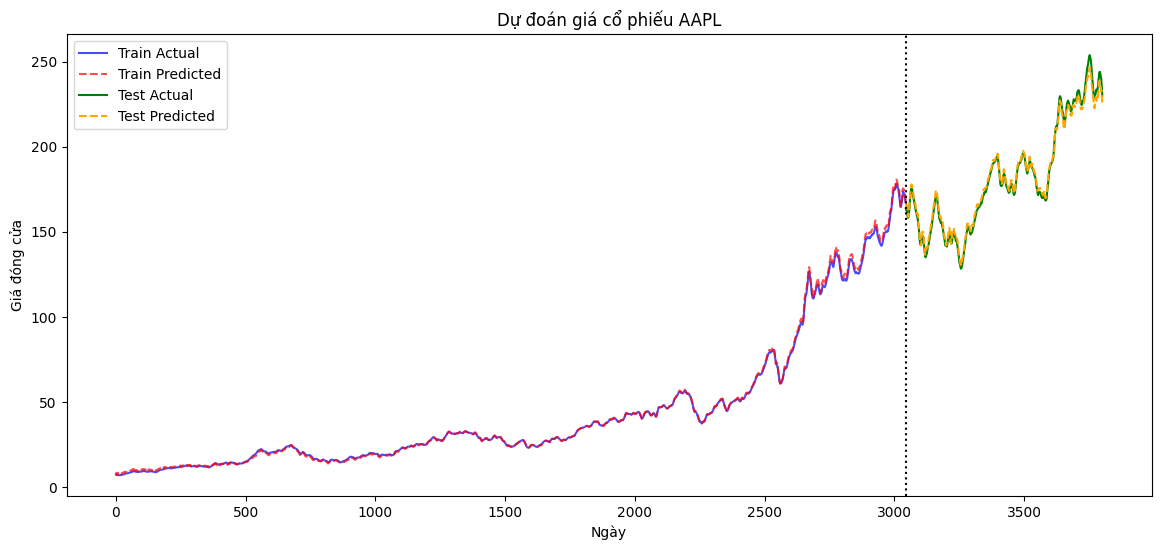


=== Đánh giá mô hình cho SPY ===
✅ SPY - Dữ liệu train: (3045, 5, 9), test: (758, 5, 9)
📌 Đọc dữ liệu test từ: data/SPY_test_data.csv của SPY
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Train: MSE=5.7503, MAE=1.9566, RMSE=2.3980, R2=0.9993
Test:  MSE=117.8940, MAE=8.4360, RMSE=10.8579, R2=0.9777


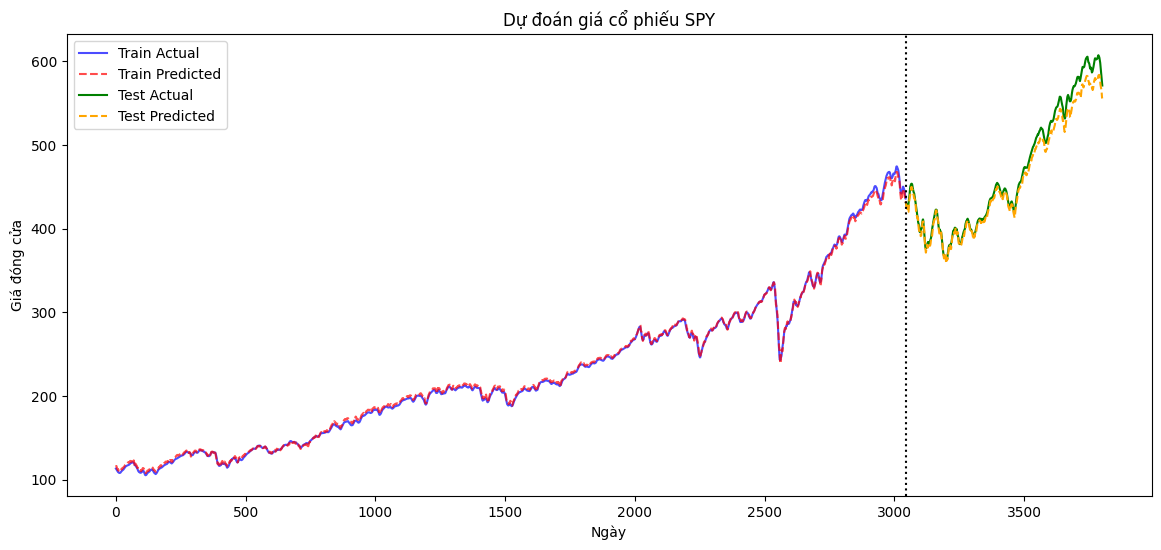


=== Đánh giá mô hình cho WMT ===
✅ WMT - Dữ liệu train: (3045, 5, 9), test: (758, 5, 9)
📌 Đọc dữ liệu test từ: data/WMT_test_data.csv của WMT
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Train: MSE=0.1657, MAE=0.2893, RMSE=0.4070, R2=0.9981
Test:  MSE=15.3889, MAE=2.0907, RMSE=3.9229, R2=0.9372


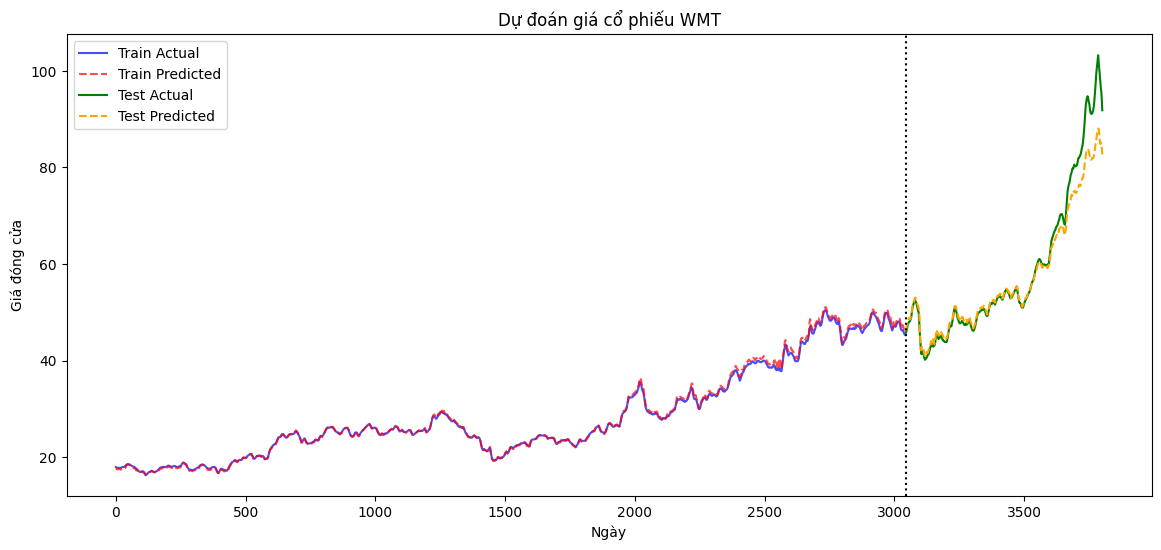


=== Đánh giá mô hình cho TSLA ===
✅ TSLA - Dữ liệu train: (2947, 5, 9), test: (734, 5, 9)
📌 Đọc dữ liệu test từ: data/TSLA_test_data.csv của TSLA
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Train: MSE=1.5000, MAE=0.7552, RMSE=1.2247, R2=0.9998
Test:  MSE=10.1196, MAE=2.3802, RMSE=3.1811, R2=0.9976


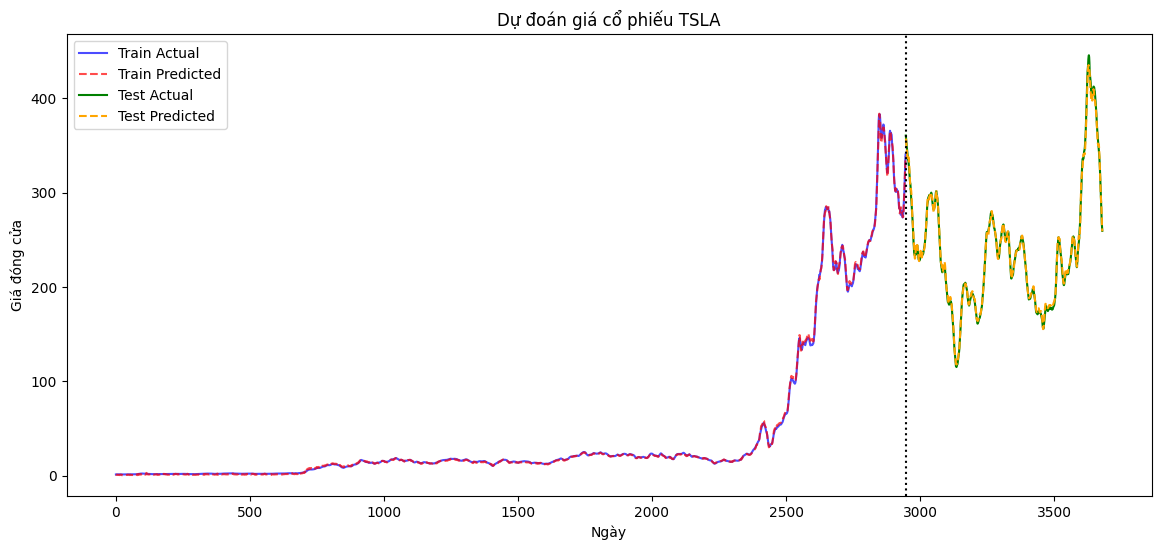


=== Đánh giá mô hình cho BABA ===
✅ BABA - Dữ liệu train: (2096, 5, 9), test: (521, 5, 9)
📌 Đọc dữ liệu test từ: data/BABA_test_data.csv của BABA
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Train: MSE=14.3415, MAE=2.6097, RMSE=3.7870, R2=0.9959
Test:  MSE=0.3081, MAE=0.3805, RMSE=0.5550, R2=0.9980


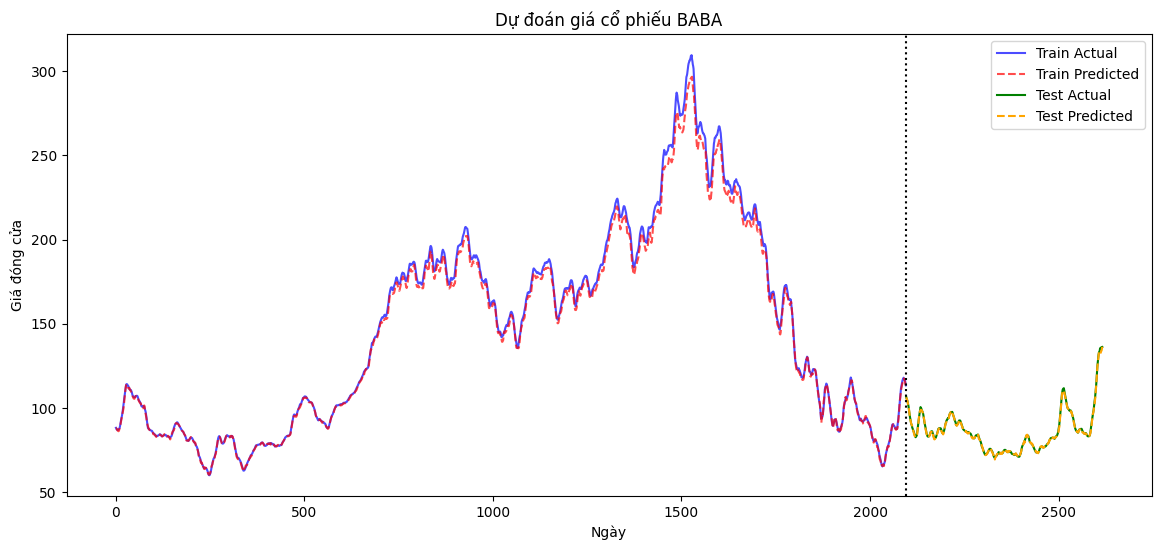

In [ ]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import joblib
import os

# Tạo thư mục lưu kết quả nếu chưa có
os.makedirs('results/gru_models', exist_ok=True)

# Số ngày quá khứ làm timestep
TIME_STEP = 5

# Duyệt qua tất cả các mã chứng khoán
for ticker in tickers:
    print(f"\n=== Đánh giá mô hình cho {ticker} ===")
    
    # Tải mô hình đã huấn luyện
    model_path = f'models/gru_models/{ticker}_gru_model.keras'
    scaler_path = f'scaler/{ticker}_scaler.pkl'
    train_path = f'data/{ticker}_train_data.csv'
    test_path = f'data/{ticker}_test_data.csv'

    if not os.path.exists(model_path) or not os.path.exists(scaler_path) or not os.path.exists(train_path) or not os.path.exists(test_path):
        print(f"⚠️ Thiếu dữ liệu hoặc mô hình cho {ticker}, bỏ qua...")
        continue

    model = load_model(model_path)
    scaler = joblib.load(scaler_path)
    
    # Đọc dữ liệu
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)

    # Loại bỏ 'Date' và lấy dữ liệu dạng numpy
    train_data = train_df.iloc[:, 1:].values
    test_data = test_df.iloc[:, 1:].values

    # Kiểm tra kích thước dữ liệu
    if len(train_data) < TIME_STEP or len(test_data) < TIME_STEP:
        print(f"⚠️ Dữ liệu {ticker} không đủ để tạo {TIME_STEP} timestep, bỏ qua...")
        continue

    # Hàm tạo dữ liệu với timestep
    def create_sequences(data, time_step):
        X, y = [], []
        for i in range(len(data) - time_step):
            X.append(data[i:i + time_step, :])  # Input với TIME_STEP ngày trước
            y.append(data[i + time_step, -1])  # Giá 'Close' cần dự đoán
        return np.array(X), np.array(y)

    # Chuẩn bị dữ liệu
    X_train, y_train = create_sequences(train_data, TIME_STEP)
    X_test, y_test = create_sequences(test_data, TIME_STEP)

    print(f"✅ {ticker} - Dữ liệu train: {X_train.shape}, test: {X_test.shape}")
    print(f"📌 Đọc dữ liệu test từ: {test_path} của {ticker}")
    
    # Dự đoán
    y_train_pred = model.predict(X_train).flatten()
    y_test_pred = model.predict(X_test).flatten()
    
    # Chuyển đổi lại giá trị về scale gốc
    def inverse_transform(X, y_pred):
        """Hàm đảo ngược dữ liệu về giá trị gốc"""
        combined = np.hstack((X[:, -1, :-1], y_pred.reshape(-1, 1)))
        return scaler.inverse_transform(combined)[:, -1]

    y_train_inv = inverse_transform(X_train, y_train_pred)
    y_test_inv = inverse_transform(X_test, y_test_pred)
    y_train_real = inverse_transform(X_train, y_train)
    y_test_real = inverse_transform(X_test, y_test)

    # Tính toán lỗi
    def evaluate(y_real, y_pred):
        mse = mean_squared_error(y_real, y_pred)
        mae = mean_absolute_error(y_real, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_real, y_pred)
        return mse, mae, rmse, r2

    mse_train, mae_train, rmse_train, r2_train = evaluate(y_train_real, y_train_inv)
    mse_test, mae_test, rmse_test, r2_test = evaluate(y_test_real, y_test_inv)

    print(f"Train: MSE={mse_train:.4f}, MAE={mae_train:.4f}, RMSE={rmse_train:.4f}, R2={r2_train:.4f}")
    print(f"Test:  MSE={mse_test:.4f}, MAE={mae_test:.4f}, RMSE={rmse_test:.4f}, R2={r2_test:.4f}")

    # Lưu kết quả vào file CSV trong thư mục results/gru_models
    result_df = pd.DataFrame({
        'Actual_Train': np.append(y_train_real, [None] * len(y_test_real)),
        'Predicted_Train': np.append(y_train_inv, [None] * len(y_test_real)),
        'Actual_Test': np.append([None] * len(y_train_real), y_test_real),
        'Predicted_Test': np.append([None] * len(y_train_real), y_test_inv),
    })
    result_df.to_csv(f'results/gru_models/{ticker}_train_test_predictions.csv', index=False)

    # Vẽ biểu đồ so sánh giá thực tế và dự đoán và lưu vào thư mục results/gru_models
    plt.figure(figsize=(14, 6))
    plt.plot(y_train_real, label='Train Actual', color='blue', alpha=0.7)
    plt.plot(y_train_inv, label='Train Predicted', color='red', linestyle='dashed', alpha=0.7)
    plt.plot(range(len(y_train_real), len(y_train_real) + len(y_test_real)), y_test_real, label='Test Actual', color='green')
    plt.plot(range(len(y_train_real), len(y_train_real) + len(y_test_real)), y_test_inv, label='Test Predicted', color='orange', linestyle='dashed')
    plt.axvline(x=len(y_train_real), color='black', linestyle='dotted')  # Đánh dấu điểm phân chia train/test
    plt.title(f'Dự đoán giá cổ phiếu {ticker}')
    plt.xlabel('Ngày')
    plt.ylabel('Giá đóng cửa')
    plt.legend()
    plt.savefig(f'results/gru_models/{ticker}_train_test_plot.png')
    plt.show()
